In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn import cluster
import CreateDataFunctions as df
from scipy.spatial import distance
data1, c1  = df.Data_gussian_cluster()
data2, c2 = df.Data_circ_cluster()
data3, c3 = df.Data_separated_clusters()

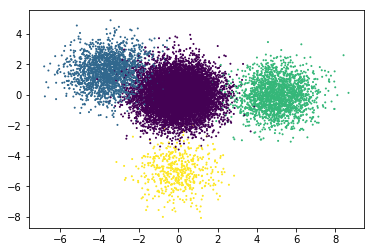

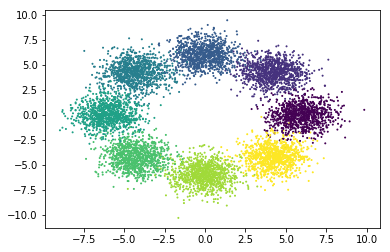

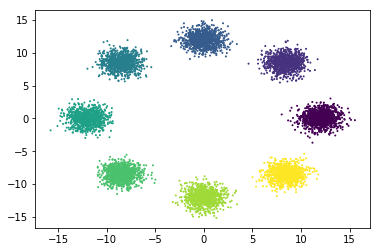

In [2]:
plt.scatter(data1[:,0],data1[:,1],s=1,c=c1)
plt.show()
plt.scatter(data2[:,0],data2[:,1],s=1,c=c2)
plt.show()
plt.scatter(data3[:,0],data3[:,1],s=1,c=c3)
plt.show()

In [13]:
def ComputeBIC(kmeans, data):
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = data.shape
    
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(data[np.where(labels == i)],
    [centers[0][i]], 'euclidean')**2) for i in range(m)])
    const_term = 0.5 * m * np.log(N) * (d+1)
    
    
    BIC = [cl_var + np.log(n)*m*i for i in range(m)]
   # BIC = (np.sum([n[i] * np.log(n[i]) -
          #     n[i] * np.log(N) -
          #   ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
         #    ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term)*(-1)
    
    return(BIC)
    
    


In [14]:
ks = range(1,10)
KMeans = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data1) for k in ks]
KMeans = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data2) for k in ks]
KMeans = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data3) for k in ks]
BIC1 = [ComputeBIC(kmeansi,data1) for kmeansi in KMeans]
BIC2 = [ComputeBIC(kmeansi,data2) for kmeansi in KMeans]
BIC3 = [ComputeBIC(kmeansi,data3) for kmeansi in KMeans]


NameError: name 'k' is not defined

[34196.099614112296, 56720.493746186105, 63435.19652255172, 67368.1699812991, 69099.85121066878, 70812.75118672545, 72487.54255155186, 74152.3139820701, 74869.30458301284, 75573.80266407091, 76286.7569516687, 76993.84583929536, 77707.48118265538, 78420.27087551683, 79124.16215772691, 79830.40098544217, 80252.47946056575, 80677.96396371977, 81086.1203191644]


Text(0, 0.5, 'value for BIC')

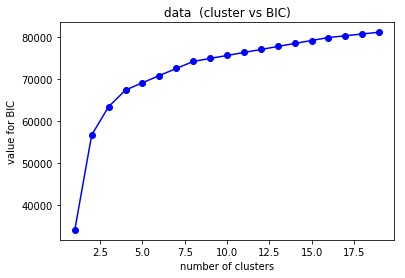

In [5]:
print(BIC1)
plt.plot(ks,BIC1,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")





[46245.23676850842, 59514.10545068227, 65262.58367216961, 68892.6552075875, 70557.57531519531, 72214.01549756115, 73848.41229849587, 75464.76656750715, 76179.83056344374, 76885.27893985713, 77597.43600456364, 78301.09564772491, 79011.64377845942, 79722.96017079157, 80433.99978583957, 81136.7391264804, 81555.23512022404, 81979.66799943017, 82387.08453976741]


Text(0, 0.5, 'value for BIC')

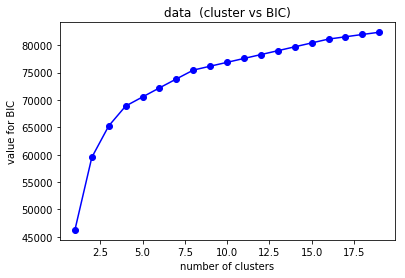

In [6]:
print(BIC2)
plt.plot(ks,BIC2,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")




[57050.317521965524, 58220.46938156927, 56362.67091864181, 53407.6258711978, 52708.101760357866, 51278.92092126886, 48303.77085211595, 39488.27480111687, 39817.01214962912, 40161.99359373274, 40504.94541685448, 40830.702993402454, 41121.929730944306, 41399.929577059185, 41715.71204112878, 41991.73859117784, 41921.03977159359, 42066.83650192355, 42048.462404561884]


Text(0, 0.5, 'value for BIC')

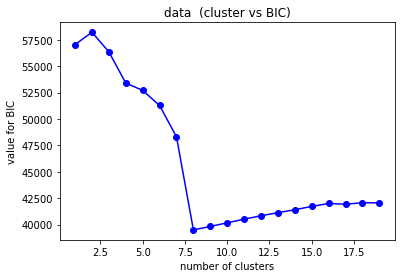

In [10]:
print(BIC3)
plt.plot(ks,BIC3,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")